# Objective 1. Import the necessary libraries

In [4]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

# Objective 2. Read the data as a data frame

In [5]:
df_Insurance = pd.read_csv("insurance.csv")

In [6]:
df_Insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objective 3. Perform basic EDA which should include the following and print out your insights at every step.

Exploratory Data Analysis(EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# Objective 3a. Shape of the data

In [7]:
df_Insurance.ndim

2

Its a 2 Dimensional Array

In [8]:
df_Insurance.size

9366

There are a total 9366 values in the given dataframe

In [9]:
df_Insurance.shape

(1338, 7)

It has 1338 rows and 7 columns

# Objective 3b. Data type of each attribute

In [10]:
df_Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It has a total of 7 columns out of which 2 each are float and int format respectively while remaining 3 are objects

# Objective 3c. Checking the presence of missing values

In [11]:
df_Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the given dataframe

# Objective 3d. 5 point summary of numerical attributes

In [12]:
df_Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Looking at the age column, data looks representative of the true age distribution of the adult population Very few people have more than 2 children. 75% of the people have 2 or less children.

The charge is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

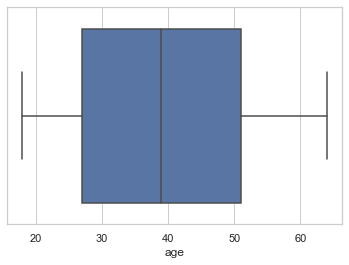

In [13]:
sns.set(style="whitegrid")
sns.boxplot(df_Insurance["age"])
plt.show()

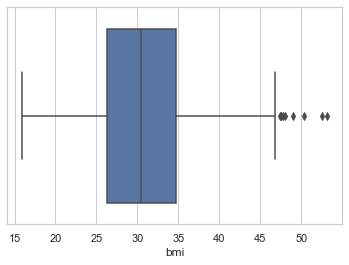

In [14]:
sns.boxplot(df_Insurance["bmi"])

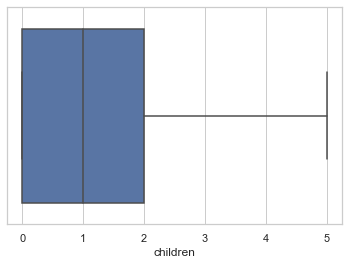

In [15]:
sns.boxplot(df_Insurance["children"])

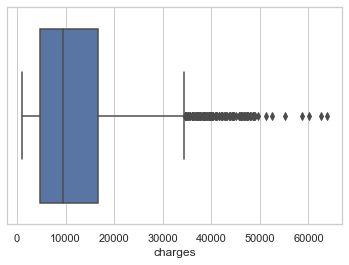

In [16]:
sns.boxplot(df_Insurance["charges"])

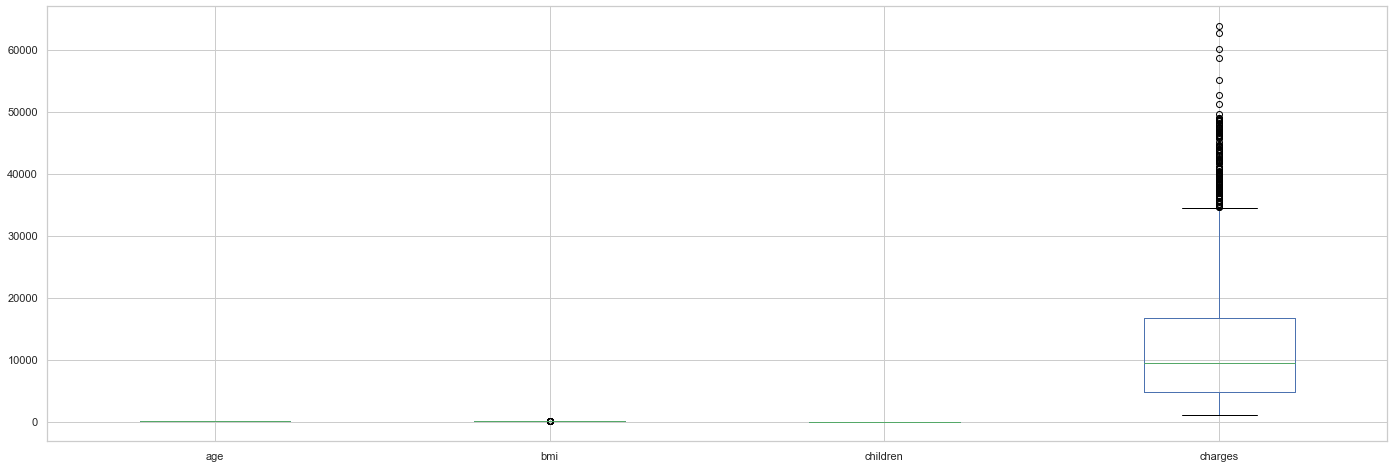

In [17]:
df_Insurance.boxplot(figsize=(24,8))

The column 'Charges'are having many outliers which may have high impact on the model we are building.


# Objective 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

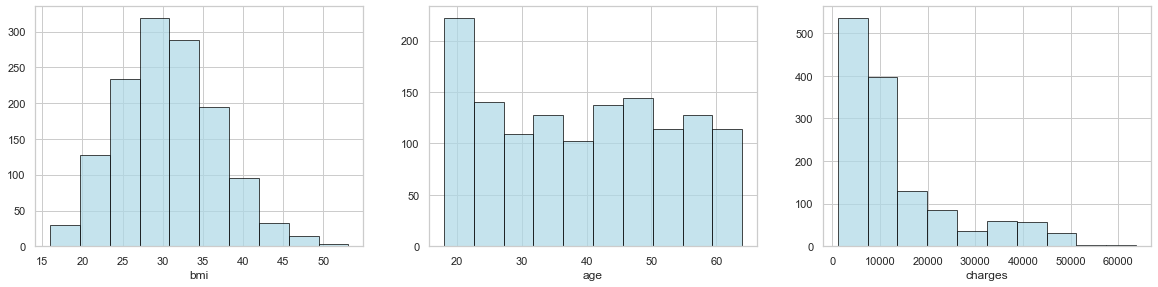

In [18]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df_Insurance.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df_Insurance.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df_Insurance.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

Bmi - Is almost in a good shape with a little left skewness.There are very low number of people with less bmi.

age - The above histogram tells that the highest density of customers are around 20yrs of age. Though the data is also present for people with higher ages.

Charges -There is a High left skewness in the dataset, which tells very less amount of individual medical costs is incurred by health insurance.

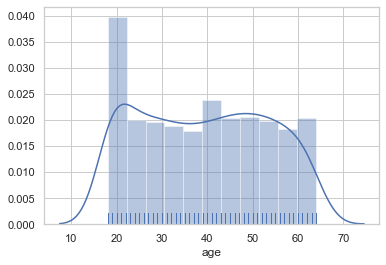

In [20]:
#Exploring the above 3 distributions further by plotting them
sns.distplot(df_Insurance['age'], kde=True, rug=True)

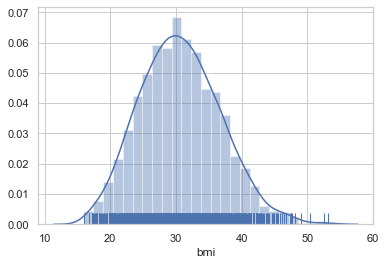

In [21]:
sns.distplot(df_Insurance['bmi'], kde=True, rug=True);

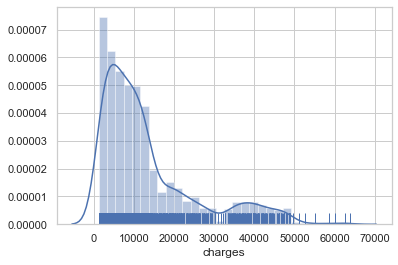

In [22]:
sns.distplot(df_Insurance['charges'], kde=True, rug=True);

bmi distribution is normal

Age is distributed uniformly

Charges are highly skewed towards one side(right)

# Objective 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [24]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_Insurance.bmi),
                                       stats.skew(df_Insurance.age),stats.skew(df_Insurance.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


Skew of bmi is very less,which was also seen in the previously

age is uniformly distributed and there isn't any skew

charges are highly skewed(positive right skewed)

# Objective 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges’ columns

In reference with the boxplots drawn above

In [25]:
iqr = np.subtract(*np.percentile(df_Insurance['charges'], [75, 25]))
print(iqr)

11899.625365


In [27]:
# identify outliers for charges

q25, q75 = np.percentile(df_Insurance['charges'], 25), np.percentile(df_Insurance['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['charges'] if x < lower or x > upper]
print('Number of outliers for charges out of 1138: %d' % len(outliers))

Number of outliers for charges out of 1138: 139


In [28]:
# identify outliers for bmi

q25, q75 = np.percentile(df_Insurance['bmi'], 25), np.percentile(df_Insurance['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['bmi'] if x < lower or x > upper]
print('Number of outliers for bmi out of 1338 records: %d' % len(outliers))

Number of outliers for bmi out of 1338 records: 9


In [29]:
# identify outliers for age

q25, q75 = np.percentile(df_Insurance['age'], 25), np.percentile(df_Insurance['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Insurance['age'] if x < lower or x > upper]
print('Number of outliers for age out of 1338 records: %d' % len(outliers))

Number of outliers for age out of 1338 records: 0


bmi has less extreme values,which implies very few customers have bmi out the range to the average bmi.

charges, as they are highly skewed, Shows most of the customers have low charges.

There aren't any outliers in age attribute.

# Objective 3h. Distribution of categorical columns (include children)

Categorical distribution plots:

Bivariate

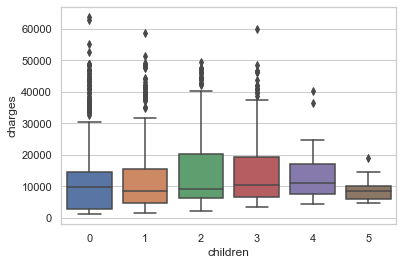

In [30]:
sns.boxplot(x='children', y='charges', data= df_Insurance)

In a few cases we see extremly higher charges are paid by customers having no child, while least charges paid by customers who have 5 children.

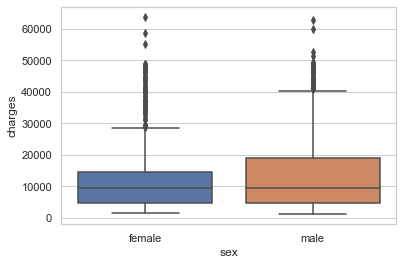

In [31]:
sns.boxplot(x='sex', y='charges', data= df_Insurance)

In both the male and female we see many of the customers have paid the extremely low charges.However female customers have more outliers while male customers have a right skew implying most of them pay higher charges compared to female customers.

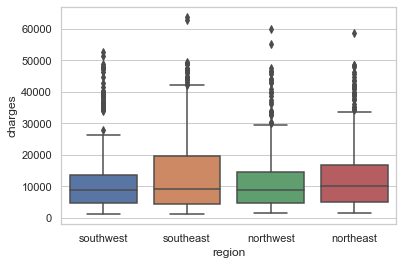

In [32]:
sns.boxplot(x='region', y='charges', data= df_Insurance)

Each location is have some extreme cases.Even though it appears that customer from southeast and northest(close second) pay somewhat higher charges

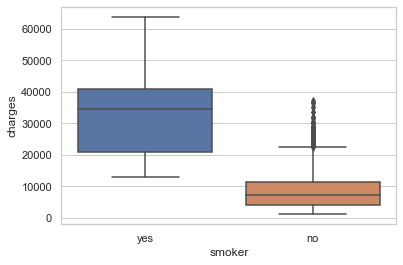

In [33]:
sns.boxplot(x='smoker', y='charges', data= df_Insurance)

Smokers pay higher medical costs billed by health insurance than the non-smokers.However, there are some outliers exists in the nonsmoker who pay higher charges.

Categorical estimate plots:

Univariate

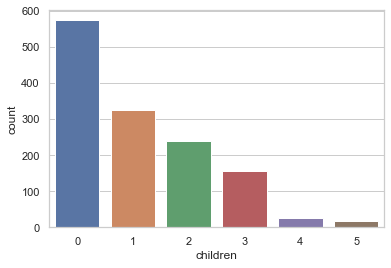

In [34]:
sns.countplot(df_Insurance['children'])

Most of the customers have no children while least of them have 5 children.

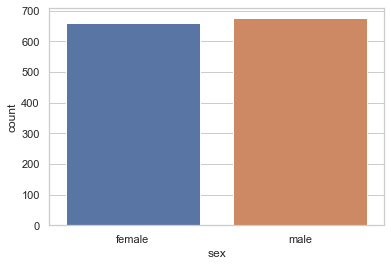

In [35]:
sns.countplot(df_Insurance['sex'])

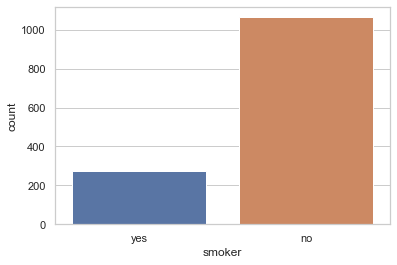

In [36]:
sns.countplot(df_Insurance['smoker'])

The count of non-smokers is quite high than the smokers in the sample.

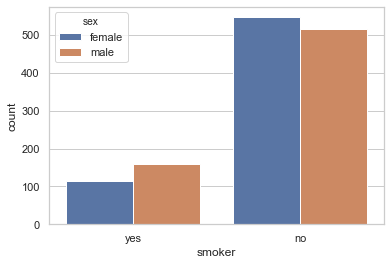

In [37]:
sns.countplot(df_Insurance['smoker'],hue = df_Insurance['sex'])

This tells the habit of smoking is not gender specific.

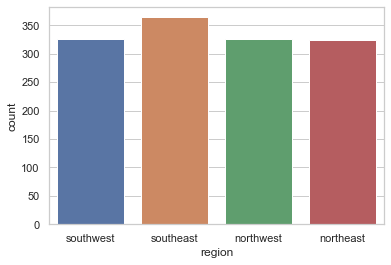

In [38]:
sns.countplot(df_Insurance['region'])

Instances are distributed evenly accross all regions.

# Objective 3i. Pair plot that includes all the columns of the data frame

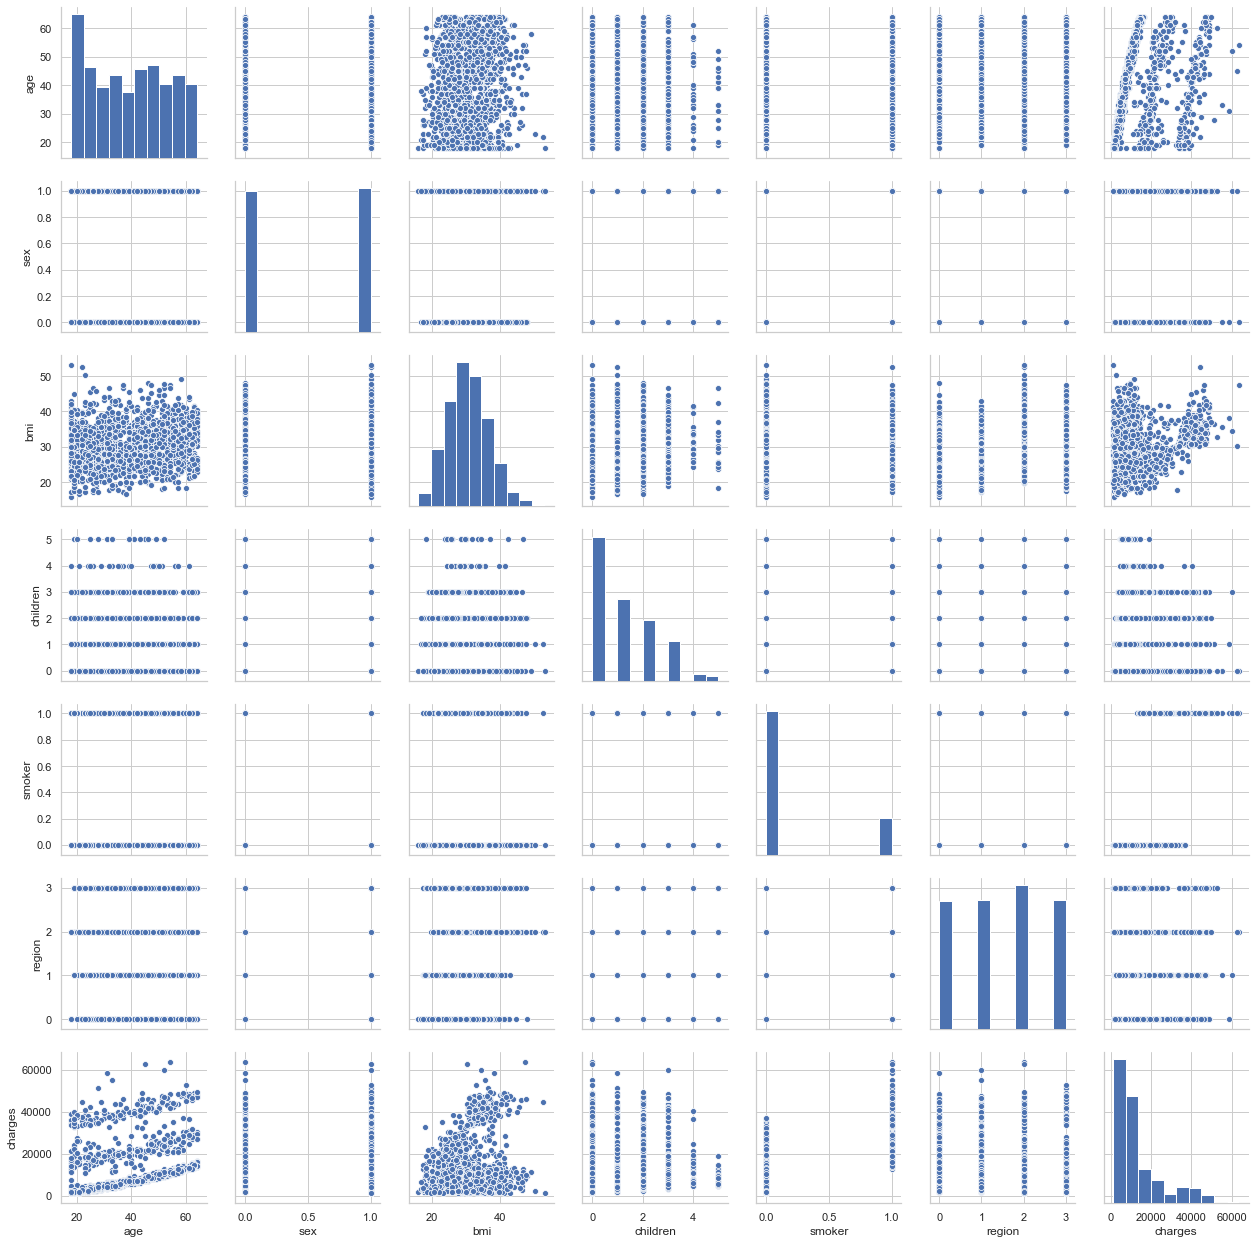

In [39]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = copy.deepcopy(df_Insurance)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = df_Insurance.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

The only obvious correlation of 'charges' is with 'smoker'

appears smokers claimed more money than non-smokers

There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

# Objective 4. Answer the following questions with statistical evidence

# Objective 4a. Do charges of people who smoke differ significantly from the people who don't?

In [40]:
df_Insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

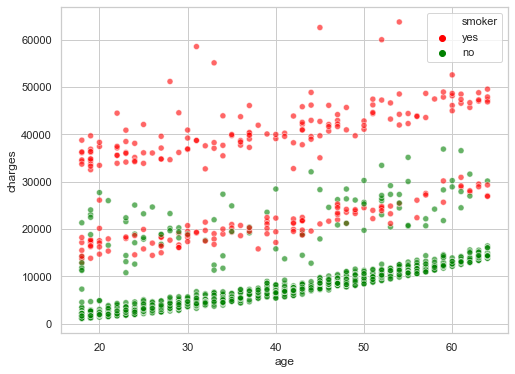

In [41]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges,hue=df_Insurance.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

Through visualization we can clearly see that smokers differ significantly from the no-smokers.

In [42]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(df_Insurance[df_Insurance.smoker == 'yes'].charges) 
# Selecting charges corresponding to smokers as an array
y = np.array(df_Insurance[df_Insurance.smoker == 'no'].charges)
# Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


Rejecting the null hypothesis as the p_value is lesser than 0.05. It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

# Objective 4b. Does bmi of males differ significantly from that of females?

In [43]:
df_Insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

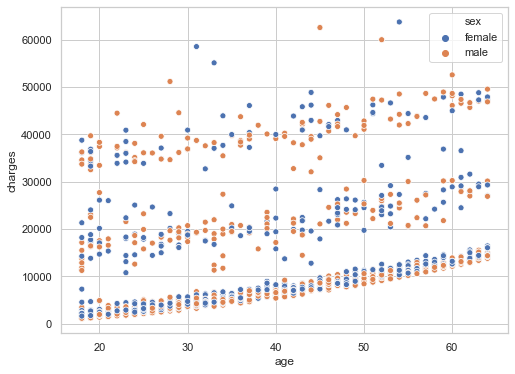

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_Insurance.age, df_Insurance.charges,hue=df_Insurance.sex  )
plt.show()

Through vizualisation here we can't clearly conclude the relation between age and charges.

In [45]:
###### Check dependency of bmi on gender.#Performing an Independent t-test
Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"   

x = np.array(df_Insurance[df_Insurance.sex == 'male'].bmi)  
y = np.array(df_Insurance[df_Insurance.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(p_value)

0.08997637178984932


Accepting nullhypothesis as pvalue >0.05. Hence,Gender has no impact on bmi.

# Objective 4c. Is the proportion of smokers significantly different in different genders?

In [46]:
# We will perform Chi_square test to check the proportion of smokers differs as per gender.
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(df_Insurance['sex'],df_Insurance['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


Rejecting null hypothesis. Hence,smoking habits differs with the gender.

# Objective 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [47]:
# Applying anova test to check the proportion.
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df = copy.deepcopy(df_Insurance[df_Insurance['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


Accepting the null hypothesis.Hence,it tells the number of children is not effecting any difference in women bmi.